<a href="https://colab.research.google.com/github/raj22bh/Image-Reconstruction-of-CIFAR-dataset/blob/main/Auto_encoder_cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TRANING AND TESTING AUTOENCODER WITH CIFAR-10 DATASET**

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
batch_size = 128
learning_rate = 0.001
num_epochs = 20

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

**BEST OF ALL AUTOENCODER HERE ---- 3 layer ----AdamW ---- MSE loss**
```
Epoch [20/20], Loss: 0.0022
```



In [ ]:
print(train_losses)
print(train_losses[::-1])


[1.0195515340880688, 1.01728332024681, 1.014924756402526, 1.0124215530085703, 1.0098078527765901, 1.0071241785304696, 1.0042727525697908, 1.0013504162757678, 0.9982350006496505, 0.995001172856785, 0.9913276622469044, 0.9872722690427781, 0.9832879514978303, 0.9786210234298983, 0.9735153499282683, 0.9679810288418775, 0.9618731940274134, 0.9542351132660718, 0.9448524112488641, 0.9318128101229358]
[0.9318128101229358, 0.9448524112488641, 0.9542351132660718, 0.9618731940274134, 0.9679810288418775, 0.9735153499282683, 0.9786210234298983, 0.9832879514978303, 0.9872722690427781, 0.9913276622469044, 0.995001172856785, 0.9982350006496505, 1.0013504162757678, 1.0042727525697908, 1.0071241785304696, 1.0098078527765901, 1.0124215530085703, 1.014924756402526, 1.01728332024681, 1.0195515340880688]


Epoch [1/20], Loss: 0.0156
Epoch [2/20], Loss: 0.0100
Epoch [3/20], Loss: 0.0089
Epoch [4/20], Loss: 0.0063
Epoch [5/20], Loss: 0.0053
Epoch [6/20], Loss: 0.0125
Epoch [7/20], Loss: 0.0046
Epoch [8/20], Loss: 0.0042
Epoch [9/20], Loss: 0.0041
Epoch [10/20], Loss: 0.0036
Epoch [11/20], Loss: 0.0034
Epoch [12/20], Loss: 0.0032
Epoch [13/20], Loss: 0.0038
Epoch [14/20], Loss: 0.0022
Epoch [15/20], Loss: 0.0024
Epoch [16/20], Loss: 0.0021
Epoch [17/20], Loss: 0.0031
Epoch [18/20], Loss: 0.0022
Epoch [19/20], Loss: 0.0034
Epoch [20/20], Loss: 0.0022


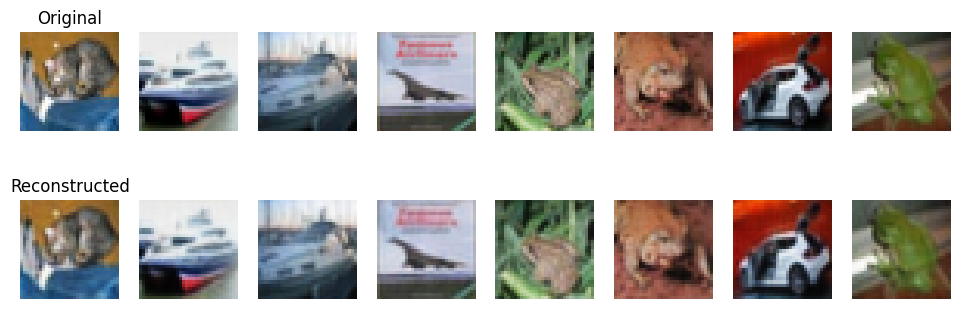

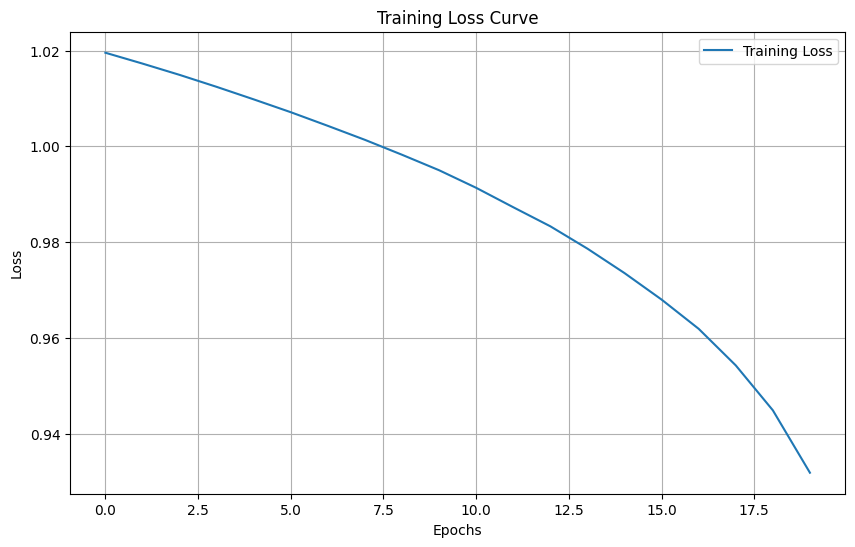

In [ ]:
# Autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),  # (B, 64, 16, 16)
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1), # (B, 128, 8, 8)
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1), # (B, 256, 4, 4)
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1), # (B, 128, 8, 8)
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),  # (B, 64, 16, 16)
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),    # (B, 3, 32, 32)
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-5)

train_losses = []
for epoch in range(num_epochs):
    model.train()
    for images, _ in train_loader:
        images = images.to(device)

        outputs = model(images)
        loss = criterion(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

train_losses=train_losses[::-1]

model.eval()
with torch.no_grad():
    for images, _ in test_loader:
        images = images.to(device)
        outputs = model(images)
        break

import matplotlib.pyplot as plt

def denormalize(imgs):
    return imgs * 0.5 + 0.5

fig, axes = plt.subplots(2, 8, figsize=(12, 4))
for i in range(8):
    axes[0, i].imshow(denormalize(images[i].cpu().permute(1, 2, 0)))
    axes[0, i].axis('off')
    axes[1, i].imshow(denormalize(outputs[i].cpu().permute(1, 2, 0)))
    axes[1, i].axis('off')
axes[0, 0].set_title("Original")
axes[1, 0].set_title("Reconstructed")
plt.show()

import matplotlib.pyplot as plt

# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.grid()
plt.show()



**2 nd with AdamW and 4 layers and MSE loss **  `Epoch [20/20], Loss: 0.0084` 😒😒😒


---



> Add blockquote



Epoch [1/20], Loss: 0.0435
Epoch [2/20], Loss: 0.0282
Epoch [3/20], Loss: 0.0246
Epoch [4/20], Loss: 0.0210
Epoch [5/20], Loss: 0.0175
Epoch [6/20], Loss: 0.0164
Epoch [7/20], Loss: 0.0145
Epoch [8/20], Loss: 0.0144
Epoch [9/20], Loss: 0.0143
Epoch [10/20], Loss: 0.0110
Epoch [11/20], Loss: 0.0130
Epoch [12/20], Loss: 0.0110
Epoch [13/20], Loss: 0.0115
Epoch [14/20], Loss: 0.0097
Epoch [15/20], Loss: 0.0102
Epoch [16/20], Loss: 0.0110
Epoch [17/20], Loss: 0.0090
Epoch [18/20], Loss: 0.0085
Epoch [19/20], Loss: 0.0083
Epoch [20/20], Loss: 0.0084


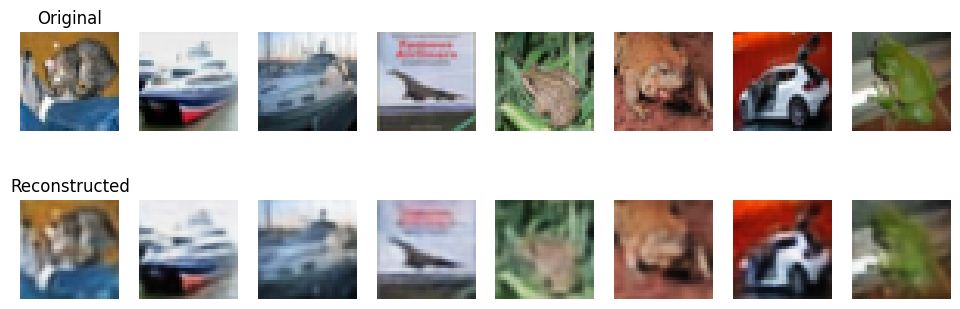

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),  # (B, 64, 16, 16)
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1), # (B, 128, 8, 8)
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1), # (B, 256, 4, 4)
            nn.ReLU(),
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1), # (B, 256, 4, 4)
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1), # (B, 128, 8, 8)
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1), # (B, 128, 8, 8)
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),  # (B, 64, 16, 16)
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),    # (B, 3, 32, 32)
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Initialize model, loss, and optimizer
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-5)



# Training loop
for epoch in range(num_epochs):
    model.train()
    for images, _ in train_loader:
        images = images.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, images)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Test the model (reconstruction)
model.eval()
with torch.no_grad():
    for images, _ in test_loader:
        images = images.to(device)
        outputs = model(images)
        break

# Visualize original and reconstructed images
import matplotlib.pyplot as plt

# Denormalize the images for visualization
def denormalize(imgs):
    return imgs * 0.5 + 0.5

fig, axes = plt.subplots(2, 8, figsize=(12, 4))
for i in range(8):
    # Original images
    axes[0, i].imshow(denormalize(images[i].cpu().permute(1, 2, 0)))
    axes[0, i].axis('off')
    # Reconstructed images
    axes[1, i].imshow(denormalize(outputs[i].cpu().permute(1, 2, 0)))
    axes[1, i].axis('off')
axes[0, 0].set_title("Original")
axes[1, 0].set_title("Reconstructed")
plt.show()


****3rd with AdamW and 3 layers and SSIM loss **

`Epoch [20/20], Loss: 0.0076`

😒😒😒

---

**

Epoch [1/20], Loss: 0.0747
Epoch [2/20], Loss: 0.0307
Epoch [3/20], Loss: 0.0232
Epoch [4/20], Loss: 0.0191
Epoch [5/20], Loss: 0.0169
Epoch [6/20], Loss: 0.0155
Epoch [7/20], Loss: 0.0143
Epoch [8/20], Loss: 0.0136
Epoch [9/20], Loss: 0.0128
Epoch [10/20], Loss: 0.0117
Epoch [11/20], Loss: 0.0113
Epoch [12/20], Loss: 0.0108
Epoch [13/20], Loss: 0.0104
Epoch [14/20], Loss: 0.0098
Epoch [15/20], Loss: 0.0095
Epoch [16/20], Loss: 0.0088
Epoch [17/20], Loss: 0.0085
Epoch [18/20], Loss: 0.0083
Epoch [19/20], Loss: 0.0081
Epoch [20/20], Loss: 0.0076


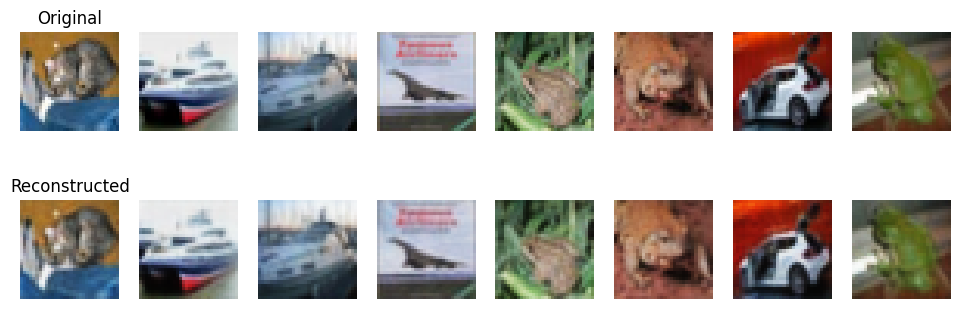

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),  # (B, 64, 16, 16)
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1), # (B, 128, 8, 8)
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1), # (B, 256, 4, 4)
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1), # (B, 128, 8, 8)
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),  # (B, 64, 16, 16)
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),    # (B, 3, 32, 32)
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = Autoencoder().to(device)

from pytorch_msssim import ssim
def loss_function(reconstructed, original):
    mse_loss = criterion(reconstructed, original)
    ssim_loss = 1 - ssim(reconstructed, original, data_range=1.0, size_average=True)  # SSIM loss
    return mse_loss + 0.1 * ssim_loss

optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-5)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for images, _ in train_loader:
        images = images.to(device)
        outputs = model(images)
        loss = loss_function(outputs, images)
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

model.eval()
with torch.no_grad():
    for images, _ in test_loader:
        images = images.to(device)
        outputs = model(images)
        break

import matplotlib.pyplot as plt
def denormalize(imgs):
    return imgs * 0.5 + 0.5

fig, axes = plt.subplots(2, 8, figsize=(12, 4))
for i in range(8):
    axes[0, i].imshow(denormalize(images[i].cpu().permute(1, 2, 0)))
    axes[0, i].axis('off')
    axes[1, i].imshow(denormalize(outputs[i].cpu().permute(1, 2, 0)))
    axes[1, i].axis('off')
axes[0, 0].set_title("Original")
axes[1, 0].set_title("Reconstructed")
plt.show()


In [ ]:
!pip install pytorch-msssim


**Test 4 --- 3 layer with Lookahead (Combine with Adam or SGD)**


# Epoch [20/20], Loss: 0.0030 : 😂
---




In [ ]:
!pip install torch-optimizer


Epoch [1/20], Loss: 0.0195
Epoch [2/20], Loss: 0.0129
Epoch [3/20], Loss: 0.0090
Epoch [4/20], Loss: 0.0083
Epoch [5/20], Loss: 0.0069
Epoch [6/20], Loss: 0.0054
Epoch [7/20], Loss: 0.0056
Epoch [8/20], Loss: 0.0047
Epoch [9/20], Loss: 0.0054
Epoch [10/20], Loss: 0.0055
Epoch [11/20], Loss: 0.0042
Epoch [12/20], Loss: 0.0037
Epoch [13/20], Loss: 0.0034
Epoch [14/20], Loss: 0.0036
Epoch [15/20], Loss: 0.0029
Epoch [16/20], Loss: 0.0032
Epoch [17/20], Loss: 0.0024
Epoch [18/20], Loss: 0.0029
Epoch [19/20], Loss: 0.0027
Epoch [20/20], Loss: 0.0030


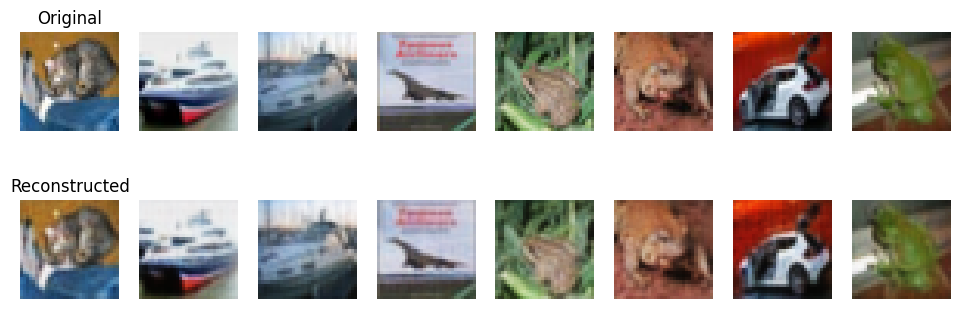

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),  # (B, 64, 16, 16)
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1), # (B, 128, 8, 8)
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1), # (B, 256, 4, 4)
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1), # (B, 128, 8, 8)
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),  # (B, 64, 16, 16)
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),    # (B, 3, 32, 32)
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
model = Autoencoder().to(device)
criterion = nn.MSELoss()
import torch_optimizer as optim
optimizer = optim.Lookahead(torch.optim.Adam(model.parameters(), lr=0.001))

for epoch in range(num_epochs):
    model.train()
    for images, _ in train_loader:
        images = images.to(device)
        outputs = model(images)
        loss = criterion(outputs, images)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    for images, _ in test_loader:
        images = images.to(device)
        outputs = model(images)
        break
import matplotlib.pyplot as plt
def denormalize(imgs):
    return imgs * 0.5 + 0.5

fig, axes = plt.subplots(2, 8, figsize=(12, 4))
for i in range(8):
    axes[0, i].imshow(denormalize(images[i].cpu().permute(1, 2, 0)))
    axes[0, i].axis('off')
    axes[1, i].imshow(denormalize(outputs[i].cpu().permute(1, 2, 0)))
    axes[1, i].axis('off')
axes[0, 0].set_title("Original")
axes[1, 0].set_title("Reconstructed")
plt.show()


**3 layer with Adam and MSE loss **
 `Epoch [20/20], Loss: 0.0028` 😁
---




Files already downloaded and verified
Files already downloaded and verified
Epoch [1/20], Loss: 0.0154
Epoch [2/20], Loss: 0.0097
Epoch [3/20], Loss: 0.0073
Epoch [4/20], Loss: 0.0063
Epoch [5/20], Loss: 0.0050
Epoch [6/20], Loss: 0.0046
Epoch [7/20], Loss: 0.0040
Epoch [8/20], Loss: 0.0036
Epoch [9/20], Loss: 0.0034
Epoch [10/20], Loss: 0.0032
Epoch [11/20], Loss: 0.0024
Epoch [12/20], Loss: 0.0037
Epoch [13/20], Loss: 0.0023
Epoch [14/20], Loss: 0.0020
Epoch [15/20], Loss: 0.0031
Epoch [16/20], Loss: 0.0020
Epoch [17/20], Loss: 0.0017
Epoch [18/20], Loss: 0.0015
Epoch [19/20], Loss: 0.0025
Epoch [20/20], Loss: 0.0028


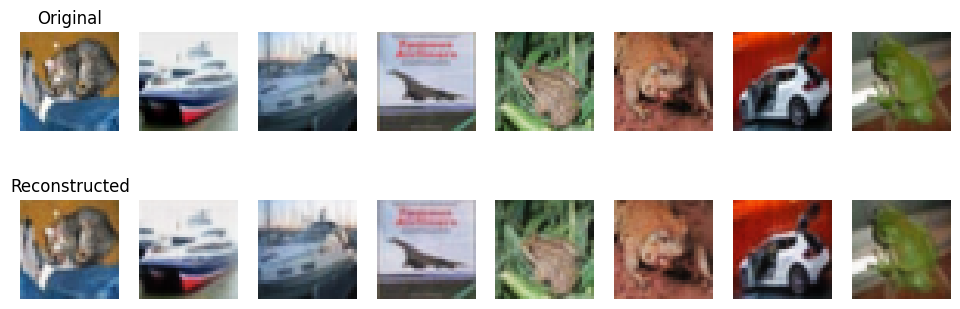

In [ ]:
# Autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),  # (B, 64, 16, 16)
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1), # (B, 128, 8, 8)
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1), # (B, 256, 4, 4)
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1), # (B, 128, 8, 8)
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),  # (B, 64, 16, 16)
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),    # (B, 3, 32, 32)
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Initialize model, loss, and optimizer
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    for images, _ in train_loader:
        images = images.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, images)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Test the model (reconstruction)
model.eval()
with torch.no_grad():
    for images, _ in test_loader:
        images = images.to(device)
        outputs = model(images)
        break

# Visualize original and reconstructed images
import matplotlib.pyplot as plt

# Denormalize the images for visualization
def denormalize(imgs):
    return imgs * 0.5 + 0.5

fig, axes = plt.subplots(2, 8, figsize=(12, 4))
for i in range(8):
    # Original images
    axes[0, i].imshow(denormalize(images[i].cpu().permute(1, 2, 0)))
    axes[0, i].axis('off')
    # Reconstructed images
    axes[1, i].imshow(denormalize(outputs[i].cpu().permute(1, 2, 0)))
    axes[1, i].axis('off')
axes[0, 0].set_title("Original")
axes[1, 0].set_title("Reconstructed")
plt.show()


Training on CIFAR 100 and testing on CIFAR 10  DATASET for the BEST MODEL------ 3 layer, AdamW and MSE loss

---



```
Epoch [20/20], Loss: 0.0020
 ```



In [ ]:
# Hyperparameters
batch_size = 128
learning_rate = 0.001
num_epochs = 20

# CIFAR-100 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR100(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


Epoch [1/20], Loss: 0.0173
Epoch [2/20], Loss: 0.0106
Epoch [3/20], Loss: 0.0078
Epoch [4/20], Loss: 0.0067
Epoch [5/20], Loss: 0.0056
Epoch [6/20], Loss: 0.0065
Epoch [7/20], Loss: 0.0040
Epoch [8/20], Loss: 0.0037
Epoch [9/20], Loss: 0.0038
Epoch [10/20], Loss: 0.0031
Epoch [11/20], Loss: 0.0035
Epoch [12/20], Loss: 0.0034
Epoch [13/20], Loss: 0.0026
Epoch [14/20], Loss: 0.0027
Epoch [15/20], Loss: 0.0024
Epoch [16/20], Loss: 0.0033
Epoch [17/20], Loss: 0.0049
Epoch [18/20], Loss: 0.0022
Epoch [19/20], Loss: 0.0021
Epoch [20/20], Loss: 0.0020


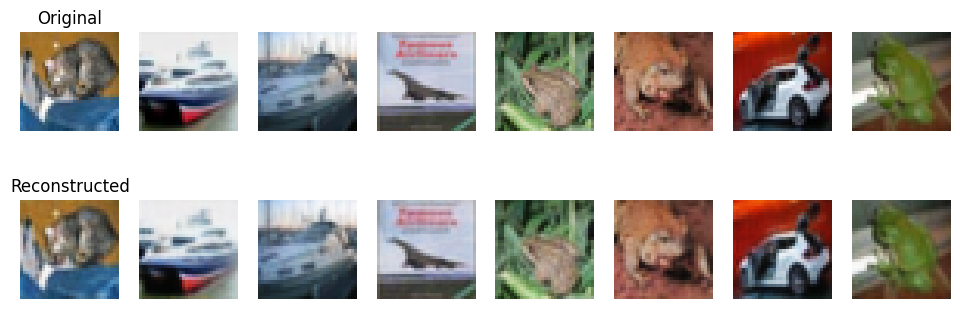

In [ ]:

# Autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),  # (B, 64, 16, 16)
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1), # (B, 128, 8, 8)
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1), # (B, 256, 4, 4)
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1), # (B, 128, 8, 8)
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),  # (B, 64, 16, 16)
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),    # (B, 3, 32, 32)
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Initialize model, loss, and optimizer
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-5)

train_losses = []
# Training loop
for epoch in range(num_epochs):
    model.train()
    for images, _ in train_loader:
        images = images.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, images)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)  # Store the average loss for this epoch

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
train_losses=train_losses[::-1]
# Test the model (reconstruction)
model.eval()
with torch.no_grad():
    for images, _ in test_loader:
        images = images.to(device)
        outputs = model(images)
        break

# Visualize original and reconstructed images
import matplotlib.pyplot as plt

# Denormalize the images for visualization
def denormalize(imgs):
    return imgs * 0.5 + 0.5

fig, axes = plt.subplots(2, 8, figsize=(12, 4))
for i in range(8):
    # Original images
    axes[0, i].imshow(denormalize(images[i].cpu().permute(1, 2, 0)))
    axes[0, i].axis('off')
    # Reconstructed images
    axes[1, i].imshow(denormalize(outputs[i].cpu().permute(1, 2, 0)))
    axes[1, i].axis('off')
axes[0, 0].set_title("Original")
axes[1, 0].set_title("Reconstructed")
plt.show()

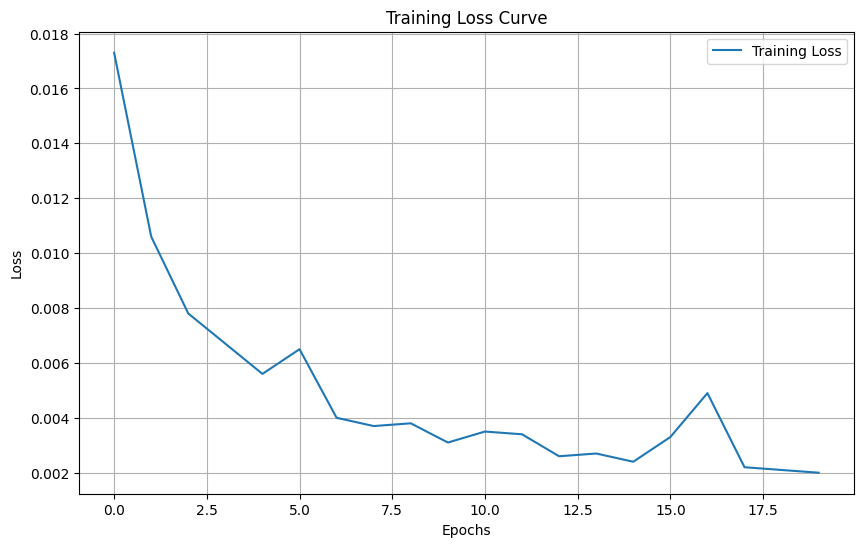

In [ ]:
import matplotlib.pyplot as plt
# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.grid()
plt.show()


***TESTING ON RANDOM DATA FROM (cifar 10 ka hi) TRAIN DATA***

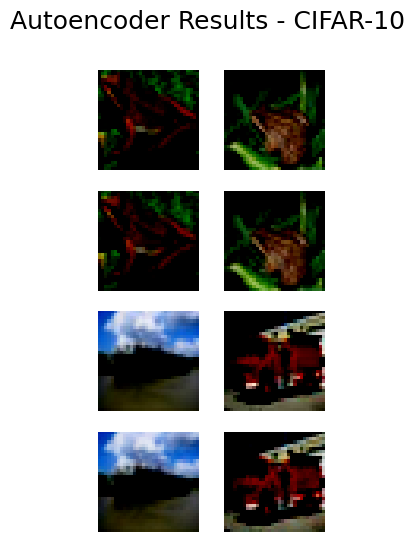

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

test_data_noisy, test_data_clean = next(iter(test_loader))
test_data_noisy, test_data_clean = test_data_noisy.to(device), test_data_clean.to(device)

num_imgs = 4
rows = 2
cols = 2
cell_size = 1.5

rand_indices = torch.randint(0, test_data_noisy.size(0), (num_imgs,))
cifar_test_images = test_data_noisy[rand_indices].cpu()
cifar_test_clean = test_data_clean[rand_indices].cpu()

model.eval()
with torch.no_grad():
    cifar_test_predicted = model(cifar_test_images.to(device)).cpu()

f = plt.figure(figsize=(cell_size * cols, cell_size * rows * 2))
f.tight_layout()

for i in range(rows):
    for j in range(cols):
        img_idx = i * cols + j

        f.add_subplot(rows * 2, cols, (2 * i * cols) + (j + 1))
        plt.imshow(np.transpose(cifar_test_images[img_idx].numpy(), (1, 2, 0)))
        plt.axis("off")

        f.add_subplot(rows * 2, cols, ((2 * i + 1) * cols) + (j + 1))
        plt.imshow(np.transpose(cifar_test_predicted[img_idx].numpy(), (1, 2, 0)))
        plt.axis("off")

f.suptitle("Autoencoder Results - CIFAR-10", fontsize=18)
plt.savefig("test_results_cifar10.png")
plt.show()
